Check CUDA version

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


Remove old versions of CUDA

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

Install CUDA 10.2 (latest acording to mxnet compatible)

In [ ]:
#!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-ubuntu1604.pin
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!apt-get update
!apt-get install cuda-10.2

--2021-03-18 13:23:52--  https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1935466336 (1.8G) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   1.80G  25.7MB/s    in 16s     

2021-03-18 13:24:09 (114 MB/s) - ‘cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb’ saved [1935466336/1935466336]

Selecting previously unselected package cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01.
(Reading database ... 124079 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-10-2-local-10.2.89-440.33.01_1.0-1_amd64

Check CUDA version (again)

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


Extension for notebook

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-5f642pq6
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-5f642pq6
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp37-none-any.whl size=4307 sha256=3f195f2ef475a7ed46184f6abb2f2f757c05e72e33efa8b3321fea04fe31375d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5sncz11_/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


Install mxnet custom version

In [ ]:
!pip uninstall mxnet
!pip install mxnet-cu102

     |█████████████████████████████▉  | 834.1MB 1.3MB/s eta 0:00:47tcmalloc: large alloc 1147494400 bytes == 0x562d9ce18000 @  0x7f80bded9615 0x562d6370306c 0x562d637e2eba 0x562d63705e8d 0x562d637f799d 0x562d63779fe9 0x562d63774b0e 0x562d6370777a 0x562d63779e50 0x562d63774b0e 0x562d6370777a 0x562d6377686a 0x562d637f87c6 0x562d63775ee2 0x562d637f87c6 0x562d63775ee2 0x562d637f87c6 0x562d63775ee2 0x562d637f87c6 0x562d63775ee2 0x562d6370769a 0x562d63775c9e 0x562d63774e0d 0x562d6370777a 0x562d63775a45 0x562d6370769a 0x562d63775a45 0x562d63774b0e 0x562d6370777a 0x562d6377686a 0x562d63774b0e
     |████████████████████████████████| 895.6MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


Check mxnet is working

In [ ]:
import mxnet as mx
print("Number GPU's: " + str(mx.context.num_gpus()))

Number GPU's: 1


# Setup

Install SCLITE for WER evaluation

In [ ]:
!git clone https://github.com/usnistgov/SCTK
%cd SCTK
!export CXXFLAGS="-std=c++11" && make config
!make all
!make check
!make install
!make doc
%cd ..

Cloning into 'SCTK'...
remote: Enumerating objects: 5115, done.
remote: Total 5115 (delta 0), reused 0 (delta 0), pack-reused 5115
Receiving objects: 100% (5115/5115), 7.26 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (3658/3658), done.
/content/SCTK
(mkdir -p bin)
(cd src && if test -f makefile ; then make config ; fi)
make[1]: Entering directory '/content/SCTK/src'
(cd asclite && if test -f makefile ; then make config ; fi)
make[2]: Entering directory '/content/SCTK/src/asclite'
(cd core && sh config.sh -prefix=`cd ../../.. && pwd`)
checking for g++... g++
checking for C++ compiler default output file name... a.out
checking whether the C++ compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether we are using the GN

You also need hsnwlib

In [ ]:
!pip install pybind11 numpy setuptools
!git clone https://github.com/nmslib/hnswlib
%cd hnswlib/python_bindings/
!python setup.py install
%cd ../..

     |████████████████████████████████| 194kB 15.7MB/s 
Cloning into 'hnswlib'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 1134 (delta 43), reused 37 (delta 19), pack-reused 1060
Receiving objects: 100% (1134/1134), 330.86 KiB | 19.46 MiB/s, done.
Resolving deltas: 100% (708/708), done.
/content/hnswlib/python_bindings
running install
running bdist_egg
running egg_info
creating hnswlib.egg-info
writing hnswlib.egg-info/PKG-INFO
writing dependency_links to hnswlib.egg-info/dependency_links.txt
writing requirements to hnswlib.egg-info/requires.txt
writing top-level names to hnswlib.egg-info/top_level.txt
writing manifest file 'hnswlib.egg-info/SOURCES.txt'
writing manifest file 'hnswlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
creating tmp
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEB

Install requirements.txt

In [ ]:
!pip install -r /content/drive/MyDrive/TFG/MXNetGluon/requirements.txt

     |████████████████████████████████| 29.6MB 103kB/s 
     |████████████████████████████████| 256kB 44.2MB/s 
     |████████████████████████████████| 1.2MB 49.0MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 890kB 51.3MB/s 
     |████████████████████████████████| 163kB 54.9MB/s 
     |████████████████████████████████| 13.8MB 27.5MB/s 
  Created wheel for leven: filename=leven-1.0.4-cp37-cp37m-linux_x86_64.whl size=55470 sha256=e1503eb0bdf94f4f49d2b87b1443477041059a630f1798e069d8c92859a39335
  Stored in directory: /root/.cache/pip/wheels/54/64/a5/439db671d666a50f3b3cebd2dcab3fbbab02785adf58e47552
  Created wheel for gluonnlp: filename=gluonnlp-0.9.0.post0-cp37-cp37m-linux_x86_64.whl size=470572 sha256=2be0d0a4ffef66d3b32b246ba7d094ab3dec865959cc5286129d97db7ec9c18c
  Stored in directory: /root/.cache/pip/wheels/72/d0/46/bb3d132569c9e521b011d26d91657c3cad0e59077303677778
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-

# Get the model

In [ ]:
import os
from os import path
import zipfile 

import mxnet as mx

dirname = 'dataset'
if not path.isdir(dirname):
    os.makedirs(dirname)
    
dirname = 'models'
if not path.isdir(dirname):
    os.makedirs(dirname)
    
print("Downloading Paragraph Segmentation parameters")
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/paragraph_segmentation2.params', dirname=dirname)

print("Downloading Word Segmentation parameters")
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/word_segmentation2.params', dirname=dirname)

print("Downloading Handwriting Line Recognition parameters")
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/handwriting_line8.params', dirname=dirname)

print("Downloading Denoiser parameters")
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/denoiser2.params', dirname=dirname)

print("Downloading cost matrices")
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/deletion_costs.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/substitute_costs.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/insertion_costs.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/substitute_probs.json', dirname=dirname)

print("Downloading fonts")
dirname = path.join('dataset','fonts')
if not path.isdir(dirname):
    os.makedirs(dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/fonts.zip', dirname=dirname)
with zipfile.ZipFile(path.join(dirname, "fonts.zip"),"r") as zip_ref:
    zip_ref.extractall(dirname)

print("Downloading text datasets")
dirname = path.join('dataset','typo')
if not path.isdir(dirname):
    os.makedirs(dirname)
    
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/alicewonder.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/all.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/text_train.txt', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/validating.json', dirname=dirname)
mx.test_utils.download('https://s3.us-east-2.amazonaws.com/gluon-ocr/models/typo-corpus-r1.txt', dirname=dirname)

'dataset/typo/typo-corpus-r1.txt'

# Handwriting Recognition

In [ ]:
!cp -r '/content/drive/MyDrive/TFG/MXNetGluon/ocr' .

In [ ]:
import json
import multiprocessing
import os
import random
import string
import time

import matplotlib.pyplot as plt
from mxboard import SummaryWriter
import mxnet as mx
from mxnet import nd, autograd, gluon
from mxnet.gluon.model_zoo.vision import resnet34_v1
import numpy as np
from skimage import transform as skimage_tf
from skimage import exposure
from tqdm import tqdm
np.seterr(all='raise')

mx.random.seed(1)

from ocr.utils.iam_dataset import IAMDataset
from ocr.utils.draw_text_on_image import draw_text_on_image

alphabet_encoding = r' !"#&\'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
alphabet_dict = {alphabet_encoding[i]:i for i in range(len(alphabet_encoding))}

## Network Definition
Define a CNN-biLSTM for handwriting recognition. Image features at two levels were obtained from a truncated Resnet34 and downsampled with a simple CNN. The 2 sets of image features were fed into two separate biLSTM for handwriting recognition.

In [ ]:
class EncoderLayer(gluon.HybridBlock):
    '''
    The encoder layer takes the image features from a CNN. The image features are transposed so that the LSTM 
    slices of the image features can be sequentially fed into the LSTM from left to right (and back via the
    bidirectional LSTM). 
    '''
    def __init__(self, hidden_states=200, rnn_layers=1, max_seq_len=100, **kwargs):
        self.max_seq_len = max_seq_len
        super(EncoderLayer, self).__init__(**kwargs)
        with self.name_scope():
            self.lstm = mx.gluon.rnn.LSTM(hidden_states, rnn_layers, bidirectional=True)
            
    def hybrid_forward(self, F, x):
        x = x.transpose((0, 3, 1, 2))
        x = x.flatten()
        x = x.split(num_outputs=self.max_seq_len, axis=1) # (SEQ_LEN, N, CHANNELS)
        x = F.concat(*[elem.expand_dims(axis=0) for elem in x], dim=0)
        x = self.lstm(x)
        x = x.transpose((1, 0, 2)) #(N, SEQ_LEN, HIDDEN_UNITS)
        return x

class CNNBiLSTM(gluon.HybridBlock):
    '''
    The CNN-biLSTM to recognise handwriting text given an image of handwriten text.
    Parameters
    ----------
    num_downsamples: int, default 2
        The number of times to downsample the image features. Each time the features are downsampled, a new LSTM
        is created. 
    resnet_layer_id: int, default 4
        The layer ID to obtain features from the resnet34
    lstm_hidden_states: int, default 200
        The number of hidden states used in the LSTMs
    lstm_layers: int, default 1
        The number of layers of LSTMs to use
    '''
    FEATURE_EXTRACTOR_FILTER = 64
    def __init__(self, num_downsamples=2, resnet_layer_id=4, rnn_hidden_states=200, rnn_layers=1, max_seq_len=100, ctx=mx.gpu(0), **kwargs):
        super(CNNBiLSTM, self).__init__(**kwargs)
        self.p_dropout = 0.5
        self.num_downsamples = num_downsamples
        self.max_seq_len = max_seq_len
        self.ctx = ctx
        with self.name_scope():
            self.body = self.get_body(resnet_layer_id=resnet_layer_id)

            self.encoders = gluon.nn.HybridSequential()
            with self.encoders.name_scope():
                for i in range(self.num_downsamples):
                    encoder = self.get_encoder(rnn_hidden_states=rnn_hidden_states, rnn_layers=rnn_layers, max_seq_len=max_seq_len)
                    self.encoders.add(encoder)
            self.decoder = self.get_decoder()
            self.downsampler = self.get_down_sampler(self.FEATURE_EXTRACTOR_FILTER)

    def get_down_sampler(self, num_filters):
        '''
        Creates a two-stacked Conv-BatchNorm-Relu and then a pooling layer to
        downsample the image features by half.
        
        Parameters
        ----------
        num_filters: int
            To select the number of filters in used the downsampling convolutional layer.
        Returns
        -------
        network: gluon.nn.HybridSequential
            The downsampler network that decreases the width and height of the image features by half.
        
        '''
        out = gluon.nn.HybridSequential()
        with out.name_scope():
            for _ in range(2):
                out.add(gluon.nn.Conv2D(num_filters, 3, strides=1, padding=1))
                out.add(gluon.nn.BatchNorm(in_channels=num_filters))
                out.add(gluon.nn.Activation('relu'))
            out.add(gluon.nn.MaxPool2D(2))
            out.collect_params().initialize(mx.init.Normal(), ctx=self.ctx)
        out.hybridize()
        return out

    def get_body(self, resnet_layer_id):
        '''
        Create the feature extraction network based on resnet34.
        The first layer of the res-net is converted into grayscale by averaging the weights of the 3 channels
        of the original resnet.
        
        Parameters
        ----------
        resnet_layer_id: int
            The resnet_layer_id specifies which layer to take from 
            the bottom of the network.
        Returns
        -------
        network: gluon.nn.HybridSequential
            The body network for feature extraction based on resnet
        '''
        
        pretrained = resnet34_v1(pretrained=True, ctx=self.ctx)
        pretrained_2 = resnet34_v1(pretrained=True, ctx=mx.cpu(0))
        first_weights = pretrained_2.features[0].weight.data().mean(axis=1).expand_dims(axis=1)
        # First weights could be replaced with individual channels.
        
        body = gluon.nn.HybridSequential()
        with body.name_scope():
            first_layer = gluon.nn.Conv2D(channels=64, kernel_size=(7, 7), padding=(3, 3), strides=(2, 2), in_channels=1, use_bias=False)
            first_layer.initialize(mx.init.Xavier(), ctx=self.ctx)
            first_layer.weight.set_data(first_weights)
            body.add(first_layer)
            body.add(*pretrained.features[1:-resnet_layer_id])
        return body

    def get_encoder(self, rnn_hidden_states, rnn_layers, max_seq_len):
        '''
        Creates an LSTM to learn the sequential component of the image features.
        
        Parameters
        ----------
        
        rnn_hidden_states: int
            The number of hidden states in the RNN
        
        rnn_layers: int
            The number of layers to stack the RNN
        Returns
        -------
        
        network: gluon.nn.Sequential
            The encoder network to learn the sequential information of the image features
        '''

        encoder = gluon.nn.HybridSequential()
        with encoder.name_scope():
            encoder.add(EncoderLayer(hidden_states=rnn_hidden_states, rnn_layers=rnn_layers, max_seq_len=max_seq_len))
            encoder.add(gluon.nn.Dropout(self.p_dropout))
        encoder.collect_params().initialize(mx.init.Xavier(), ctx=self.ctx)
        return encoder
    
    def get_decoder(self):
        '''
        Creates a network to convert the output of the encoder into characters.
        '''

        alphabet_size = len(alphabet_encoding) + 1
        decoder = mx.gluon.nn.Dense(units=alphabet_size, flatten=False)
        decoder.collect_params().initialize(mx.init.Xavier(), ctx=self.ctx)
        return decoder

    def hybrid_forward(self, F, x):
        features = self.body(x)
        hidden_states = []
        hs = self.encoders[0](features)
        hidden_states.append(hs)
        for i, _ in enumerate(range(self.num_downsamples - 1)):
            features = self.downsampler(features)
            hs = self.encoders[i+1](features)
            hidden_states.append(hs)
        hs = F.concat(*hidden_states, dim=2)
        output = self.decoder(hs)
        return output

## Helper functions to customize the dataset

Helpers to get custom images

In [ ]:
import cv2

def resize_image(image, desired_size):
    ''' Helper function to resize an image while keeping the aspect ratio.
    Parameter
    ---------
    
    image: np.array
        The image to be resized.

    desired_size: (int, int)
        The (height, width) of the resized image

    Return
    ------

    image: np.array
        The image of size = desired_size

    bounding box: (int, int, int, int)
        (x, y, w, h) in percentages of the resized image of the original
    '''
    size = image.shape[:2]
    if size[0] > desired_size[0] or size[1] > desired_size[1]:
        ratio_w = float(desired_size[0])/size[0]
        ratio_h = float(desired_size[1])/size[1]
        ratio = min(ratio_w, ratio_h)
        new_size = tuple([int(x*ratio) for x in size])
        image = cv2.resize(image, (new_size[1], new_size[0]))
        size = image.shape
            
    delta_w = max(0, desired_size[1] - size[1])
    delta_h = max(0, desired_size[0] - size[0])
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
            
    color = image[0][0]
    if color < 230:
        color = 230
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=float(color))
    crop_bb = (left/image.shape[1], top/image.shape[0], (image.shape[1] - right - left)/image.shape[1],
               (image.shape[0] - bottom - top)/image.shape[0])
    image[image > 230] = 255
    return image, crop_bb




MAX_IMAGE_SIZE_FORM = (1120, 800)
MAX_IMAGE_SIZE_LINE = (60, 800)
MAX_IMAGE_SIZE_WORD = (30, 140)


#this function takes in the img file path
def _pre_process_image(img_in,_parse_method):
    im = cv2.imread(img_in, cv2.IMREAD_GRAYSCALE)
    if np.size(im) == 1: # skip if the image data is corrupt.
        return None
    # reduce the size of form images so that it can fit in memory.
    if _parse_method in ["form", "form_bb"]:
        im, _ = resize_image(im, MAX_IMAGE_SIZE_FORM)
    if _parse_method == "line":
        im, _ = resize_image(im, MAX_IMAGE_SIZE_LINE)
    if _parse_method == "word":
        im, _ = resize_image(im, MAX_IMAGE_SIZE_WORD)
    img_arr = np.asarray(im)
    return img_arr


Load custom images

In [ ]:
!cp '/content/drive/MyDrive/TFG/HTG/output.zip' '.'
!unzip './output.zip'

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: content/output/line165/word38_img4.png  
  inflating: content/output/line165/word18_img4.png  
  inflating: content/output/line165/word24_img3.png  
 extracting: content/output/line165/word39_img1.png  
 extracting: content/output/line165/word27_img0.png  
  inflating: content/output/line165/word26_img4.png  
 extracting: content/output/line165/word5_img2.png  
  inflating: content/output/line165/word23_img3.png  
  inflating: content/output/line165/word9_img4.png  
  inflating: content/output/line165/word8_img4.png  
 extracting: content/output/line165/word18_img3.png  
  inflating: content/output/line165/word2_img0.png  
 extracting: content/output/line165/word6_img3.png  
  inflating: content/output/line165/word8_img3.png  
 extracting: content/output/line165/word6_img2.png  
 extracting: content/output/line165/word35_img3.png  
 extracting: content/output/line165/word14_img2.png  
  inflating: content/output/

## Helper functions to train the network

In [ ]:
def transform(image, label):
    '''
    This function resizes the input image and converts so that it could be fed into the network.
    Furthermore, the label (text) is one-hot encoded.
    '''
    image = np.expand_dims(image, axis=0).astype(np.float32)
    if image[0, 0, 0] > 1:
        image = image/255.
    image = (image - 0.942532484060557) / 0.15926149044640417
    label_encoded = np.zeros(max_seq_len, dtype=np.float32)-1
    i = 0
    for word in label:
        word = word.replace("&quot", r'"')
        word = word.replace("&amp", r'&')
        word = word.replace('";', '\"')
        for letter in word:
            label_encoded[i] = alphabet_dict[letter]
            i += 1
    return image, label_encoded

def augment_transform(image, label):
    '''
    This function randomly:
        - translates the input image by +-width_range and +-height_range (percentage).
        - scales the image by y_scaling and x_scaling (percentage)
        - shears the image by shearing_factor (radians)
    '''
    
    ty = random.uniform(-random_y_translation, random_y_translation)
    tx = random.uniform(-random_x_translation, random_x_translation)

    sx = random.uniform(1. - random_y_scaling, 1. + random_y_scaling)
    sy = random.uniform(1. - random_x_scaling, 1. + random_x_scaling)

    s = random.uniform(-random_shearing, random_shearing)
    
    gamma = random.uniform(0.001, 2)
    image = exposure.adjust_gamma(image, gamma)
    st = skimage_tf.AffineTransform(scale=(sx, sy),
                                    shear=s,
                                    translation=(tx*image.shape[1], ty*image.shape[0]))
    augmented_image = skimage_tf.warp(image, st, cval=1.0)
    
    return transform(augmented_image*255., label)


def decode(prediction):
    '''
    Returns the string given one-hot encoded vectors.
    '''

    results = []
    for word in prediction:
        result = []
        for i, index in enumerate(word):
            if i < len(word) - 1 and word[i] == word[i+1] and word[-1] != -1: #Hack to decode label as well
                continue
            if index == len(alphabet_dict) or index == -1:
                continue
            else:
                result.append(alphabet_encoding[int(index)])
        results.append(result)
    words = [''.join(word) for word in results]
    return words

In [ ]:
#run_epoch(0, net, test_data, None, log_dir, print_name="pretrained", is_train=False)
def run_epoch(e, network, dataloader, trainer, log_dir, print_name, is_train):
    total_loss = nd.zeros(1, ctx)
    for i, (x, y) in enumerate(dataloader):
        x = x.as_in_context(ctx)
        y = y.as_in_context(ctx)

        with autograd.record(train_mode=is_train):
            output = network(x)
            loss_ctc = ctc_loss(output, y)

        if is_train:
            loss_ctc.backward()
            trainer.step(x.shape[0])

        if i == 0 and e % send_image_every_n == 0 and e > 0:
            predictions = output.softmax().topk(axis=2).asnumpy()
            decoded_text = decode(predictions)
            output_image = draw_text_on_image(x.asnumpy(), decoded_text)
            output_image[output_image < 0] = 0
            output_image[output_image > 1] = 1
            print("{} first decoded text = {}".format(print_name, decoded_text[0]))
            with SummaryWriter(logdir=log_dir, verbose=False, flush_secs=5) as sw:
                sw.add_image('bb_{}_image'.format(print_name), output_image, global_step=e)

        total_loss += loss_ctc.mean()

    epoch_loss = float(total_loss.asscalar())/len(dataloader)

    with SummaryWriter(logdir=log_dir, verbose=False, flush_secs=5) as sw:
        sw.add_scalar('loss', {print_name: epoch_loss}, global_step=e)

    return epoch_loss

In [ ]:
ctx = mx.gpu() if mx.context.num_gpus() > 0 else mx.cpu()
print("Number of GPUs: " + str(mx.context.num_gpus()))
epochs = 120
learning_rate = 0.0001
batch_size = 32

max_seq_len = 160
print_every_n = 5
send_image_every_n = 5

num_downsamples = 2
resnet_layer_id = 4
lstm_hidden_states = 512
lstm_layers = 2

random_y_translation, random_x_translation = 0.03, 0.03
random_y_scaling, random_x_scaling = 0.1, 0.1
random_shearing = 0.7

log_dir = "./logs/handwriting_recognition"
checkpoint_dir = "model_checkpoint"
checkpoint_name = "handwriting.params"

Number of GPUs: 1


In [ ]:
!cp '/content/drive/MyDrive/TFG/MXNetGluon/credentials.json' .

In [ ]:
!mkdir /content/dataset
!mkdir /content/dataset/iamdataset
!cp '/content/drive/MyDrive/TFG/MXNetGluon/dataset/iamdataset/largeWriterIndependentTextLineRecognitionTask.zip' '/content/dataset/iamdataset'
!cp '/content/drive/MyDrive/TFG/MXNetGluon/dataset/iamdataset/lines.tgz' '/content/dataset/iamdataset'
!cp '/content/drive/MyDrive/TFG/MXNetGluon/dataset/iamdataset/xml.tgz' '/content/dataset/iamdataset'

mkdir: cannot create directory ‘/content/dataset’: File exists


In [ ]:
!mkdir /content/dataset/iamdataset/subject
!unzip /content/drive/MyDrive/TFG/MXNetGluon/dataset/iamdataset/largeWriterIndependentTextLineRecognitionTask.zip -d /content/dataset/iamdataset/subject/

Archive:  /content/drive/MyDrive/TFG/MXNetGluon/dataset/iamdataset/largeWriterIndependentTextLineRecognitionTask.zip
  inflating: /content/dataset/iamdataset/subject/LargeWriterIndependentTextLineRecognitionTask.txt  
  inflating: /content/dataset/iamdataset/subject/testset.txt  
  inflating: /content/dataset/iamdataset/subject/trainset.txt  
  inflating: /content/dataset/iamdataset/subject/validationset1.txt  
  inflating: /content/dataset/iamdataset/subject/validationset2.txt  


In [ ]:
train_enabled = False
if train_enabled:
  train_ds = IAMDataset("line", output_data="text", train=True)
  print("Number of training samples: {}".format(len(train_ds)))

test_enabled = True
if test_enabled:
  test_ds = IAMDataset("line", output_data="text", train=False)
  print("Number of testing samples: {}".format(len(test_ds)))

Processing data:
Completed: [--------------------------------------- ]  99%Number of testing samples: 1860


In [ ]:
if train_enabled:
  train_data = gluon.data.DataLoader(train_ds.transform(augment_transform), batch_size, shuffle=True, last_batch="rollover", num_workers=4)
if test_enabled:
  test_data = gluon.data.DataLoader(test_ds.transform(transform), batch_size, shuffle=True, last_batch="keep", num_workers=4)#, num_workers=multiprocessing.cpu_count()-2)

## Train

In [ ]:
net = CNNBiLSTM(num_downsamples=num_downsamples, resnet_layer_id=resnet_layer_id , rnn_hidden_states=lstm_hidden_states, rnn_layers=lstm_layers, max_seq_len=max_seq_len, ctx=ctx)
net.hybridize()

In [ ]:
ctc_loss = gluon.loss.CTCLoss(weight=0.2)
best_test_loss = 10e5

In [ ]:
if (os.path.isfile(os.path.join(checkpoint_dir, checkpoint_name))):
    net.load_parameters(os.path.join(checkpoint_dir, checkpoint_name))
    print("Parameters loaded")
    print(run_epoch(0, net, test_data, None, log_dir, print_name="pretrained", is_train=False))

In [ ]:
pretrained = "models/handwriting_line8.params"
if test_enabled:
  if (os.path.isfile(pretrained)):
      net.load_parameters(pretrained, ctx=ctx)
      print("Parameters loaded")
      print(run_epoch(0, net, test_data, None, log_dir, print_name="pretrained", is_train=False))

Parameters loaded
3.1418925139863614


In [ ]:
if train_enabled:
  trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate})

In [ ]:
if train_enabled:
  for e in tqdm(range(epochs)):
      train_loss = run_epoch(e, net, train_data, trainer, log_dir, print_name="train", is_train=True)
      test_loss = run_epoch(e, net, test_data, trainer, log_dir, print_name="test", is_train=False)    
      if test_loss < best_test_loss:
          print("Saving network, previous best test loss {:.6f}, current test loss {:.6f}".format(best_test_loss, test_loss))
          net.save_parameters(os.path.join(checkpoint_dir, checkpoint_name))
          best_test_loss = test_loss
          
      if e % print_every_n == 0 and e > 0:
          print("Epoch {0}, train_loss {1:.6f}, test_loss {2:.6f}".format(e, train_loss, test_loss))

## Results

In [ ]:
img = _pre_process_image('/content/word0_img0.png','line')
test_ds = []
test_ds.append([img, 'insert'])

CREATE


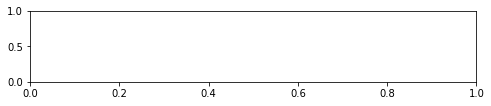

In [ ]:
figs_to_plot = 1
fig, axs = plt.subplots(figs_to_plot, figsize=(8, 1.3*figs_to_plot))

for i in range(figs_to_plot):
    n = int(random.random()*len(test_ds))
    image, actual_label = test_ds[n]
    image, _ = transform(image, actual_label)

    image = nd.array(image)
    image = image.as_in_context(ctx)
    image = image.expand_dims(axis=0)
    output = net(image)
    predictions = output.softmax().topk(axis=2).asnumpy()
    decoded_prediction_text = decode(predictions)[0].replace("&quot", '\"').replace("&amp", "&").replace('";', '\"')
    print(decoded_prediction_text)
    # axs[i].imshow(image.asnumpy().squeeze(), cmap='Greys_r')
    # axs[i].set_title("[Label]: {}\n[Pred]:  {}".format(actual_label[0].replace("&quot", '\"').replace("&amp", "&").replace('";', '\"'), decoded_prediction_text),
    #                 fontdict={"horizontalalignment":"left", "family":"monospace"}, x=0)
    # axs[i].tick_params(axis='both',       
    #                    which='both',      
    #                    bottom=False,      
    #                    top=False,         
    #                    left=False,
    #                    right=False,
    #                    labelleft=False,
    #                    labelbottom=False)

In [ ]:
from openpyxl import Workbook
import os
fnInfer = '/content/content/output/'
wb = Workbook() # Work with .xlsx files (Excel)
err = 0
NUM_IMGS_PER_WORD = 5

for root, dirs, files in os.walk(fnInfer):
    for directory in tqdm(dirs):
        err_dir = ""
        wr = wb.create_sheet(directory)
        # wp = wb.create_sheet(directory + "_prob")
        for _, _, files in os.walk(fnInfer + directory):
            cellsR = [[0 for i in range(NUM_IMGS_PER_WORD)] for j in range(len(files)//NUM_IMGS_PER_WORD)]
            # cellsP = [[0 for i in range(NUM_IMGS_PER_WORD)] for j in range(len(files)//NUM_IMGS_PER_WORD)]
            for file in files:
                word = file.split('_')[0][4:]
                img  = file.split('_')[1][3:].split('.')[0]
                try:
                    pp_img = _pre_process_image(fnInfer + directory + '/' + file, 'line')
                    image, _ = transform(pp_img, '')
                    image = nd.array(image)
                    image = image.as_in_context(ctx)
                    image = image.expand_dims(axis=0)
                    output = net(image)
                    predictions = output.softmax().topk(axis=2).asnumpy()
                    decoded_prediction_text = decode(predictions)[0].replace("&quot", '\"').replace("&amp", "&").replace('";', '\"')
                    #print(decoded_prediction_text)
                except:
                    err += 1
                    err_dir = err_dir + file + ' '
                    # print("Error in line: ", directory, file, "Total errors: ", err)
                    raise
                try:
                  cellsR [int(word)][int(img)] = decoded_prediction_text
                  # cellsP [int(word)][int(img)] = recprob[1][0]
                except:
                  print("ERROR IN IMAGE!! ")
                  print(directory, word, img, str(len(cellsR)), str(len(cellsR[0])), decoded_prediction_text)
                  err_dir = err_dir + file + ' '
                  pass
            for w in range(len(cellsR)):
                wr.append(cellsR[w])
                # wp.append(cellsP[w])
            wb.save("inferOutput.xlsx")
            !cp "/content/inferOutput.xlsx" "/content/drive/MyDrive/TFG/MXNetGluon/"
        if err_dir != "":
          with open("./errors/" +directory + "_errors.txt", "w") as erf:
            erf.write(err_dir)
    break
print("FINISHED. TOTAL ERRORS: ", err)


100%|██████████| 446/446 [1:02:47<00:00,  8.45s/it]

FINISHED. TOTAL ERRORS:  0


In [ ]:
!cp 'inferOutput.xlsx' '/content/drive/MyDrive/TFG/MXNetGluon/'

## Writing the transformed test dataset for validating the language denoiser

In [ ]:
# ds_lm = test_ds.transform(transform)

In [ ]:
# for image, actual_label in tqdm(ds_lm):
#     image = nd.array(image)
#     image = image.as_in_context(ctx)
#     image = image.expand_dims(axis=0)
#     output = net(image)
#     predictions = output.softmax().topk(axis=2).asnumpy()
#     decoded_prediction_text = decode(predictions)[0]
#     outputs.append([decode([actual_label])[0].replace("&quot;", '"').replace("&amp;", "&"), decoded_prediction_text.replace("&quot", '\"').replace("&amp", "&").replace('";', '\"')])

In [ ]:
# json.dump(outputs, open('dataset/typo/validating.json', 'w'))

In [ ]:
# ds_lm = train_ds
# with open('dataset/typo/text_train.txt', 'w') as f:
#     for _, actual_label in ds_lm:
#         f.write(str(actual_label[0].replace("&quot;", '"').replace("&amp;", "&"))+"\n")